Student: Duncan Ferguson <br>
Student Id: 871641260 <br>
Class: Comp 4431-1 <br>
Assignment: Assignment 2 <br>
Date: 11/12/2021 <br>
*Project was Completed by Individual, group is just listed below for reference to past code that might
be reused from previous Excercises* <br>
Group: Name: Broken Toe <br>
Group Members: Emma Bright, Mike Santoro <br>

### Assignment Description:
In this assignment you are to use Decision trees and Naive Bayes for classification. In addition, you are to explore
 your models to determine which feature vector attributes you can remove without "significantly hurting"
 classification importance. There is no single "right" answer for this question. Also, "significantly hurting"
 is a judgement call, please explain why you mean by that and provided numeric values. You should start with
 the full dataset and look at the decision tree features_importances_ and naive bayes permutation_importance
 to guid which attributes to remove. You will then want to iteratively remove attributes, possibly one at a time or
 several at a time. Again, there is no single "right way" to do this.

The goal is to predict whether it will rain tomorrow given the days weather statistics. The last column,
"Rain Tomorrow" is the classification value for I have cleaned the data set for you. I removed a few attributes that
were almost all zeros, and replaced missing values with the mean value for that column. Also, strings have been
transformed into numeric values so the data set will work well for both decision trees and naive bayes. <br>

#### What To Turn In: <br>
1). A report that explains which attributes you have eliminated, why those, and what effect this has on the quality of
predictions compared to using the full dataset. Feel free to include a table of feature_importances and
 permutation_importances that show how any why you reduced the set of attributes. <br>

2). Your code for creating the decision tree and naive bayes models and getting the feature/permuttion importances.
Your code does not need to cover your whole experimental space, but should provide enough information to show how you
made at least one decision about which attribute (column) to eliminate

In [482]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.naive_bayes import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

To start of this project I have decided to look at the correlations first to get a bit more of a grasp
on what the data is doing.

In [483]:
# Importing the Data

np.random.seed(0)
df = pd.read_csv("assignment2_cleanInfile.csv")
df.head()
df_did_rain = df[df["RainTomorrow"] != 0]
df_did_not_rain = df[df["RainTomorrow"] == 0]
print(df_did_rain["RainTomorrow"].unique())
print(df_did_not_rain["RainTomorrow"].unique())

[1]
[0]


<AxesSubplot:>

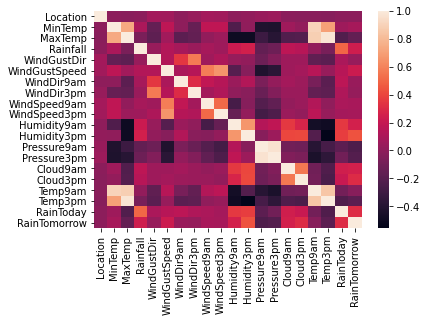

In [484]:
sns.heatmap(df.corr())

This Heat Map Correlation gives us some middle of the ground results.
After going through this assignment a few times I've decided to give it a look at only looking
at the data for predicting if it rains tomorrow

In [485]:
corr_matrix = df.corr().abs()
corr_matrix

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,1.000000,0.006194,0.020490,0.003457,0.075197,0.069269,0.001938,0.030553,0.077038,0.064180,0.002065,0.011066,0.036492,0.046345,0.010908,0.015860,0.015596,0.022718,0.004146,0.003579
MinTemp,0.006194,1.000000,0.733919,0.103314,0.149557,0.173331,0.002464,0.145183,0.174946,0.174187,0.232372,0.005913,0.424357,0.434034,0.061460,0.015902,0.897999,0.699828,0.055856,0.083717
MaxTemp,0.020490,0.733919,1.000000,0.074202,0.176500,0.066329,0.181369,0.158061,0.014586,0.050381,0.499777,0.499725,0.309093,0.397422,0.226776,0.214469,0.880087,0.969735,0.227421,0.159087
Rainfall,0.003457,0.103314,0.074202,1.000000,0.033045,0.127250,0.083133,0.042696,0.085977,0.056762,0.221392,0.249609,0.159676,0.120366,0.171613,0.145848,0.011384,0.077553,0.500997,0.236874
WindGustDir,0.075197,0.149557,0.176500,0.033045,1.000000,0.129199,0.346856,0.565715,0.063066,0.111046,0.031133,0.009683,0.120842,0.042960,0.054864,0.054884,0.169948,0.188980,0.104836,0.032470
WindGustSpeed,0.069269,0.173331,0.066329,0.127250,0.129199,1.000000,0.105557,0.142515,0.577864,0.658377,0.209272,0.025822,0.426600,0.384642,0.052281,0.080202,0.146756,0.032274,0.148977,0.225264
WindDir9am,0.001938,0.002464,0.181369,0.083133,0.346856,0.105557,1.000000,0.303920,0.180750,0.140181,0.045541,0.130543,0.069431,0.016679,0.077771,0.049737,0.077939,0.190261,0.161716,0.037676
WindDir3pm,0.030553,0.145183,0.158061,0.042696,0.565715,0.142515,0.303920,1.000000,0.072087,0.120499,0.004543,0.018472,0.134676,0.043689,0.040593,0.043644,0.157454,0.174121,0.113843,0.021842
WindSpeed9am,0.077038,0.174946,0.014586,0.085977,0.063066,0.577864,0.180750,0.072087,1.000000,0.513079,0.269027,0.030991,0.215178,0.165050,0.019171,0.041080,0.128769,0.005026,0.101399,0.090524
WindSpeed3pm,0.064180,0.174187,0.050381,0.056762,0.111046,0.658377,0.140181,0.120499,0.513079,1.000000,0.144270,0.015789,0.277495,0.239743,0.041369,0.019803,0.162144,0.028443,0.078856,0.086909


In [486]:
def train_data(df, drops=None):
    """This Function splits the data to train and test the data. It also an element for being able to
    drop certain rows."""
    # Y is the classification
    Y = df['RainTomorrow'].tolist()
    X = df.copy()
    X = X.drop(columns=["RainTomorrow"])
    if drops != None:
        X = X.drop(columns=drops)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    return x_train, x_test, y_train, y_test, X


In [487]:
def decisionTree_Model(x_train, x_test, y_train, y_test, X, yes_print=False):
    """This Function goes through building a decision tree and creating a confusion matrix
    computing accuracy, and listing the decision tree features and their importance"""
    # Building out a decision tree
    dtree = tree.DecisionTreeClassifier(criterion="gini")
    dtree = dtree.fit(x_train, y_train)
    y_predicted = dtree.predict(x_test)
    accuracy = accuracy_score(y_test, y_predicted)
    important = dtree.feature_importances_
    df_importance_list = []
    for i, v in enumerate(important):
        df_importance_list.append([X.columns[i], v])
    df_importance = pd.DataFrame(df_importance_list, columns=["FName", "Score"])
    df_importance.sort_values(by=['Score'], ascending=False, inplace=True)
    decisionTree_Model_Features = df_importance["FName"].tolist()
    if yes_print:
        print("DecisionTree Accuracy: ", accuracy)
        print("DecisionTree Confusion Matrix:")
        print(confusion_matrix(y_test, y_predicted))
        print("decision tree dtree feature importance:")
        print(df_importance)
    return accuracy, decisionTree_Model_Features


In [488]:
def GausianNB_Model(x_train, x_test, y_train, y_test, X, yes_print=False):
    """This Function goes through the GausianNB model and calculates the accuracy, computes the confusion matrix
    and then lists the Gaussian Model Features and their significance"""
    model2 = GaussianNB()
    model2.fit(x_train, y_train)
    gausianNB_predicted = model2.predict(x_test)
    accuracy = accuracy_score(y_test, gausianNB_predicted)
    imps = permutation_importance(model2, x_test, y_test)
    df_Gausian_Feature_Importance_List = []
    Gausian_Feature_Importance_List =  imps.importances_mean.tolist()
    for row in enumerate(Gausian_Feature_Importance_List):
        df_Gausian_Feature_Importance_List.append([X.columns[row[0]], row[1]])
    df_Gausian_Feature_Importance = pd.DataFrame(df_Gausian_Feature_Importance_List, columns=["Feature", "Significance"])
    df_Gausian_Feature_Importance.sort_values(by=["Significance"], ascending=False, inplace=True)
    GausianND_Features = df_Gausian_Feature_Importance["Feature"].tolist()
    if yes_print:
        print('\nconfusion_matrix from Gaussian naive bayes:')
        print(confusion_matrix(y_test, gausianNB_predicted))
        print('accuracy = ' + str(accuracy))
        print("gausianNB feature importance:")
        print(df_Gausian_Feature_Importance)
    return accuracy, GausianND_Features

In [489]:
df = pd.read_csv("assignment2_cleanInfile.csv")

x_train, x_test, y_train, y_test, X = train_data(df)
dt_a, dt_f = decisionTree_Model(x_train, x_test, y_train, y_test, X, True)

# train_data(df)
gm_a, gm_f = GausianNB_Model(x_train, x_test, y_train, y_test, X, True)

DecisionTree Accuracy:  0.7843258600804524
DecisionTree Confusion Matrix:
[[23618  4005]
 [ 3662  4264]]
decision tree dtree feature importance:
            FName     Score
11    Humidity3pm  0.268860
13    Pressure3pm  0.072560
3        Rainfall  0.063940
5   WindGustSpeed  0.060039
1         MinTemp  0.050088
10    Humidity9am  0.048687
12    Pressure9am  0.047536
16        Temp9am  0.045614
17        Temp3pm  0.045001
0        Location  0.040346
2         MaxTemp  0.039299
9    WindSpeed3pm  0.036592
8    WindSpeed9am  0.034055
7      WindDir3pm  0.031931
4     WindGustDir  0.031225
15       Cloud3pm  0.030189
6      WindDir9am  0.029780
14       Cloud9am  0.021221
18      RainToday  0.003038

confusion_matrix from Gaussian naive bayes:
[[24213  3410]
 [ 3488  4438]]
accuracy = 0.8059579735013643
gausianNB feature importance:
          Feature  Significance
11    Humidity3pm      0.013919
3        Rainfall      0.013587
13    Pressure3pm      0.005159
5   WindGustSpeed      0.004169

The Code above displays confusion matrix and accuracy of both the Decision Tree Model and the Gaussian Naive Bayes
 models with all of the features included. In this instance the Gaussian model was more accurate than the decision tree
  model. Both models show that rain today has the lowest score/signifcance in the models. One would assume that to
   make these models more accurate we would remove "RainToday" to improve the models.

I have set up the train_data function to drop features for retraining the data to be run back through the models.

In [490]:
# Dropping Rain Today
x_train, x_test, y_train, y_test, X = train_data(df, "RainToday")
# Decision Tree Model
dt_a, dt_f = decisionTree_Model(x_train, x_test, y_train, y_test, X, True)

DecisionTree Accuracy:  0.7815128414301387
DecisionTree Confusion Matrix:
[[23533  4090]
 [ 3677  4249]]
decision tree dtree feature importance:
            FName     Score
11    Humidity3pm  0.267915
13    Pressure3pm  0.073500
3        Rainfall  0.065227
5   WindGustSpeed  0.060248
1         MinTemp  0.053279
10    Humidity9am  0.049318
12    Pressure9am  0.047377
16        Temp9am  0.046591
17        Temp3pm  0.043340
0        Location  0.040075
2         MaxTemp  0.039315
9    WindSpeed3pm  0.037006
8    WindSpeed9am  0.034378
7      WindDir3pm  0.031334
4     WindGustDir  0.030908
15       Cloud3pm  0.030401
6      WindDir9am  0.029767
14       Cloud9am  0.020021


In [491]:
# Gaussian Naive Bayes Model
gm_a, gm_f = GausianNB_Model(x_train, x_test, y_train, y_test, X, True)


confusion_matrix from Gaussian naive bayes:
[[24720  2903]
 [ 3617  4309]]
accuracy = 0.8165911839995499
gausianNB feature importance:
          Feature  Significance
11    Humidity3pm      0.023117
3        Rainfall      0.017109
13    Pressure3pm      0.005840
5   WindGustSpeed      0.005592
12    Pressure9am      0.004923
15       Cloud3pm      0.003567
10    Humidity9am      0.003483
1         MinTemp      0.002627
14       Cloud9am      0.000647
0        Location     -0.000304
4     WindGustDir     -0.000636
16        Temp9am     -0.000647
7      WindDir3pm     -0.000720
6      WindDir9am     -0.000731
8    WindSpeed9am     -0.000793
9    WindSpeed3pm     -0.000866
17        Temp3pm     -0.001243
2         MaxTemp     -0.001542


Now looking at both the models we notice something interesting. The accuracy for the Gaussian model went up. While
the Accuracy for the  Decision Tree went slightly down.

The Next Step is to work with the Gaussian model removing features. I have set up the code so that we can look
at the accuracy, followed by the features that are included

In [492]:
x_train, x_test, y_train, y_test, X = train_data(df, ["RainToday", "MaxTemp"])
gm_a, gm_f = GausianNB_Model(x_train, x_test, y_train, y_test, X, True)


confusion_matrix from Gaussian naive bayes:
[[24901  2722]
 [ 3705  4221]]
accuracy = 0.8192072913443416
gausianNB feature importance:
          Feature  Significance
10    Humidity3pm      0.024124
2        Rainfall      0.018369
14       Cloud3pm      0.005272
9     Humidity9am      0.004912
4   WindGustSpeed      0.004518
12    Pressure3pm      0.003972
11    Pressure9am      0.002729
16        Temp3pm      0.001660
13       Cloud9am      0.001384
1         MinTemp      0.001170
15        Temp9am      0.000281
0        Location      0.000236
6      WindDir3pm     -0.000006
3     WindGustDir     -0.000051
5      WindDir9am     -0.000411
7    WindSpeed9am     -0.000850
8    WindSpeed3pm     -0.001176


The Gaussian Model is continuing to improve. We can see by removing the lowest ranked feature significance is actually
improving the model. Below I have iteratively gone through the Gaussian model removing one by one the features
with the lowest signifigance untill the accuracy stops improving.

In [493]:
x_train, x_test, y_train, y_test, X = train_data(df, ["RainToday",
                                                      "MaxTemp",
                                                      "WindSpeed3pm",
                                                      "WindGustDir",
                                                      "WindDir3pm",
                                                      "WindSpeed9am",
                                                      "WindDir9am",
                                                      "Temp9am",
                                                      "Location"])
gm_a, gm_f = GausianNB_Model(x_train, x_test, y_train, y_test, X, True)


confusion_matrix from Gaussian naive bayes:
[[25081  2542]
 [ 3683  4243]]
accuracy = 0.8248895890179752
gausianNB feature importance:
         Feature  Significance
4    Humidity3pm      0.026285
1       Rainfall      0.019106
2  WindGustSpeed      0.008945
8       Cloud3pm      0.005232
6    Pressure3pm      0.005137
5    Pressure9am      0.003994
3    Humidity9am      0.003668
9        Temp3pm      0.001890
7       Cloud9am      0.001885
0        MinTemp      0.001710


In [494]:
x_train, x_test, y_train, y_test, X = train_data(df, ["RainToday",
                                                      "MaxTemp",
                                                      "WindSpeed3pm",
                                                      "WindGustDir",
                                                      "WindDir3pm",
                                                      "WindSpeed9am",
                                                      "WindDir9am",
                                                      "Temp9am",
                                                      "Location",
                                                      "MinTemp"])
gm_a, gm_f = GausianNB_Model(x_train, x_test, y_train, y_test, X, True)


confusion_matrix from Gaussian naive bayes:
[[25075  2548]
 [ 3722  4204]]
accuracy = 0.823623730625334
gausianNB feature importance:
         Feature  Significance
3    Humidity3pm      0.024563
0       Rainfall      0.018673
1  WindGustSpeed      0.008996
5    Pressure3pm      0.005182
7       Cloud3pm      0.004670
4    Pressure9am      0.004563
2    Humidity9am      0.002678
8        Temp3pm      0.000675
6       Cloud9am      0.000624


In the backward selection with the Gaussian Model. Accuracy stops improving after we remove every feature that has
a negative significance value. The two models above show the point at which the model no longer improves when removing
variables. <br>

Leaving us with the best model for the Gausian Naive Bayes Model using backward selection as the model
that includes:<br>
 [Humidity3pm, RainFall, WindGustSpeed, Cloud3pm, Humidity9am, Preasure3pm, Preasure9am, Temp3pm, Cloud9am, Mintemp]

Excludes:
["RainToday", "MaxTemp", "WindSpeed3pm","WindGustDir", "WindDir3pm", "WindSpeed9am", "WindDir9am", "Temp9am", "Location"]
<br>

Accuracy: 0.8248895890179752

Now to take a look at manipulating the decision tree model. If we note from above that when we removed "RainToday"
the model actually lost accuracy. Because of this I have decided to code in a backward selection only looking
at the accuracy and iterating through every feature. Removing one at a time and returning back the model that
has the highest accuracy.

In [500]:
def backward_selection(accuracy, features, selection, df, model):
    """This is a backward selection model that removes one feature at a time to see if we can improve the
    accuracy of the model. Once any improvement is reached the function returns which feature that was dropped
    that improves the model. The features that were included and the accuracy of the new model"""
    features_loop = [word for word in features if word not in selection]
    accuracy_start = accuracy
    for feature in features_loop:
        x_train, x_test, y_train, y_test, X = train_data(df, [feature] + selection)  # Dropping selection and feature
        if model == 1:  # 1 For decisionTree
            new_accuracy, new_features = decisionTree_Model(x_train, x_test, y_train, y_test, X, False)
        else:
            new_accuracy, new_features = GausianNB_Model(x_train, x_test, y_train, y_test, X, False)
        if new_accuracy >= accuracy_start:
            print("Accuracy:", new_accuracy, "\nFeatures:", new_features,"\nDropped Feature:", feature)
            return
    return "No Improvement"

In [501]:
# Starting the backward selection model with no drop features.
features = df.columns.tolist()
features.pop(-1)
accuracy = 0.7815128414301387
selection = []

backward_selection(accuracy, features, selection, df, 1)

Accuracy: 0.7837069959773834 
Features: ['Humidity3pm', 'Pressure3pm', 'Rainfall', 'WindGustSpeed', 'MinTemp', 'Humidity9am', 'Pressure9am', 'Temp9am', 'Temp3pm', 'MaxTemp', 'WindSpeed3pm', 'WindDir3pm', 'WindSpeed9am', 'WindGustDir', 'WindDir9am', 'Cloud3pm', 'Cloud9am', 'RainToday'] 
Dropped Feature: Location


With this first iteration of the backward selection implemented on the decision tree. Removing "WindDir9am"
that dropping Cloud3pm actually improves the model.

The next few step shows the iterative process of removing features and the improvement to the decision treemodel
using the backward selection

In [502]:
selection = ["WindDir9am"]
accuracy = 0.7866606655602126
backward_selection(accuracy, features, selection, df, 1)

Accuracy: 0.7869138372387409 
Features: ['Humidity3pm', 'Pressure3pm', 'Rainfall', 'WindGustSpeed', 'Temp9am', 'Humidity9am', 'Pressure9am', 'Temp3pm', 'MaxTemp', 'Location', 'WindSpeed3pm', 'WindSpeed9am', 'WindDir3pm', 'WindGustDir', 'Cloud3pm', 'Cloud9am', 'RainToday'] 
Dropped Feature: MinTemp


In [503]:
selection = ["WindDir9am", "MinTemp"]
accuracy = 0.7869138372387409
backward_selection(accuracy, features, selection, df, 1)

'No Improvement'

This process shows that removing WindDir9am and Min Temp leave us with an accuracy of 0.7869138372387409 that cannot
be beat using the iterative process. This is an improvement from the full decision tree model with an accuracy of
0.7815128414301387

Using the same backward selection model, I am testing the Gaussian Model to see if we can improve the model that
we were left with by removing all the negative values.

In [504]:
selection = ["RainToday", "MaxTemp", "WindSpeed3pm","WindGustDir", "WindDir3pm", "WindSpeed9am", "WindDir9am",
             "Temp9am", "Location"]
accuracy = 0.8248895890179752
backward_selection(accuracy, features, selection, df, 0)

Accuracy: 0.8256491040535598 
Features: ['Humidity3pm', 'Rainfall', 'WindGustSpeed', 'Cloud3pm', 'Temp3pm', 'Cloud9am', 'Pressure3pm', 'Pressure9am', 'MinTemp'] 
Dropped Feature: Humidity9am


In [506]:
Accuracy= 0.8256491040535598
selection =  ['Humidity3pm', 'Rainfall', 'WindGustSpeed', 'Cloud3pm', 'Temp3pm', 'Cloud9am', 'Pressure3pm',
              'Pressure9am', 'MinTemp', "Humidity9am"]
backward_selection(accuracy, features, selection, df, 0)

'No Improvement'

Looking at the results above. We can slighly improve the Gaussian model that we were given. By dropping Humidity 9am
from the model we were able to improve the Accuracy to 0.8256491040535598

Accuracy: 0.8256491040535598
Features Included: ['Humidity3pm', 'Rainfall', 'WindGustSpeed', 'Cloud3pm', 'Temp3pm', 'Cloud9am', 'Pressure3pm',
              'Pressure9am', 'MinTemp', "Humidity9am"]

Now to double check that the backward selection works on the gausian that we were able to achieve by simply removing
the features that had the negative model.

In [507]:
selection = []
accuracy = 0
backward_selection(accuracy, features, selection, df, 0)

Accuracy: 0.8059861036878675 
Features: ['Humidity3pm', 'Rainfall', 'Pressure3pm', 'WindGustSpeed', 'Pressure9am', 'Cloud3pm', 'MinTemp', 'WindSpeed3pm', 'Cloud9am', 'Humidity9am', 'WindGustDir', 'WindDir3pm', 'WindSpeed9am', 'Temp9am', 'WindDir9am', 'Temp3pm', 'RainToday', 'MaxTemp'] 
Dropped Feature: Location


In [508]:
selection = ["Location"]
accuracy = 0.8059861036878675
backward_selection(accuracy, features, selection, df, 0)

Accuracy: 0.8074207431995274 
Features: ['Humidity3pm', 'Rainfall', 'Pressure3pm', 'WindGustSpeed', 'Cloud3pm', 'Pressure9am', 'Humidity9am', 'Cloud9am', 'MinTemp', 'Temp9am', 'WindGustDir', 'WindDir3pm', 'WindSpeed3pm', 'Temp3pm', 'WindDir9am', 'WindSpeed9am', 'RainToday'] 
Dropped Feature: MaxTemp


In [ ]:
selection = ["Location", "MaxTemp"]
accuracy = 0.8074207431995274
backward_selection(accuracy, features, selection, df, 0)

In [ ]:
selection = ["Location", "MaxTemp", "WindGustDir"]
accuracy = 0.8079833469295902
backward_selection(accuracy, features, selection, df, 0)

In [ ]:
selection = ["Location", "MaxTemp", "WindGustDir", "WindDir9am"]
accuracy = 0.8084615601001435
backward_selection(accuracy, features, selection, df, 0)

In [ ]:
selection = ["Location", "MaxTemp", "WindGustDir", "WindDir9am", "WindSpeed9am"]
accuracy = 0.8099805901713129
backward_selection(accuracy, features, selection, df, 0)

In [ ]:
selection = ["Location", "MaxTemp", "WindGustDir", "WindDir9am", "WindSpeed9am", "MinTemp"]
accuracy = 0.8099805901713129
backward_selection(accuracy, features, selection, df, 0)

In [ ]:
selection = ["Location", "MaxTemp", "WindGustDir", "WindDir9am", "WindSpeed9am", "MinTemp", "WindDir3pm"]
accuracy = 0.8103744127823568
backward_selection(accuracy, features, selection, df, 0)

In [ ]:
selection = ["Location", "MaxTemp", "WindGustDir", "WindDir9am", "WindSpeed9am", "MinTemp", "WindDir3pm", "WindSpeed3pm"]
accuracy = 0.8109651466989226
backward_selection(accuracy, features, selection, df, 0)

In [ ]:
selection = ["Location", "MaxTemp", "WindGustDir", "WindDir9am", "WindSpeed9am", "MinTemp", "WindDir3pm", "WindSpeed3pm",
             "Humidity9am"]
accuracy = 0.8132436918056767
backward_selection(accuracy, features, selection, df, 0)

In [ ]:
selection = ["Location", "MaxTemp", "WindGustDir", "WindDir9am", "WindSpeed9am", "MinTemp", "WindDir3pm", "WindSpeed3pm",
             "Humidity9am", "Temp9am"]
accuracy = 0.8135812540437143
backward_selection(accuracy, features, selection, df, 0)

In [ ]:
selection = ["Location", "MaxTemp", "WindGustDir", "WindDir9am", "WindSpeed9am", "MinTemp", "WindDir3pm", "WindSpeed3pm",
             "Humidity9am", "Temp9am", "RainToday"]
accuracy = 0.8247208078989564
backward_selection(accuracy, features, selection, df, 0)

In [ ]:
selection = ["Location", "MaxTemp", "WindGustDir", "WindDir9am", "WindSpeed9am", "MinTemp", "WindDir3pm", "WindSpeed3pm",
             "Humidity9am", "Temp9am", "RainToday", "Pressure9am"]
accuracy = 0.8249177192044783
backward_selection(accuracy, features, selection, df, 0)

In [521]:
selection = ["Location", "MaxTemp", "WindGustDir", "WindDir9am", "WindSpeed9am", "MinTemp", "WindDir3pm", "WindSpeed3pm",
             "Humidity9am", "Temp9am", "RainToday", "Pressure9am", "Cloud9am"]
accuracy = 0.8276744774817857
backward_selection(accuracy, features, selection, df, 0)

'No Improvement'

After that Long selection Process we were able to come out with a accuracy of <br>
Accuracy: 0.8276744774817857 <br>
Included Features: ['Humidity3pm', 'Rainfall', 'WindGustSpeed', 'Cloud3pm', 'Pressure3pm', 'Temp3pm']

Compared to taking all of the negative significant features then removing features with backward selection from there

Accuracy: 0.8256491040535598
Features Included: ['Humidity3pm', 'Rainfall', 'WindGustSpeed', 'Cloud3pm', 'Temp3pm', 'Cloud9am', 'Pressure3pm',
              'Pressure9am', 'MinTemp', "Humidity9am"]